<a href="https://colab.research.google.com/github/AsthaModi/DataScience_SparksFoundation/blob/main/LinearRegression_ScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**
## **Task 1: Prediction using supervised ML**
### **Name: Astha Modi**
**Topic:** Prediction of score of a student based on the number of hours of study.This is a simple linear regression task as it involves just 2 variables.

Here, I have used Linear Regression technique which is derived from equation of line y=mx+c, where x is independent variables, y is dependent variable, m is the slope and c is the intercept.

## **Step 1: Importing libraries**
The first step is to import the libraries that are required for the implementation of the code operation.  Here we import the Pandas to import and analyze data, NumPy to perform the multi-dimensional operation, and matplotlib to perform graphical plot into the context.

In [1]:
#importing all the libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## **Step 2: Loading Data**
 Importing the data set using the following url: http://bit.ly/w-data

In [2]:
#Loading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data loaded successfully")

Data loaded successfully


**Step A:**
*   Describe the data
*   Print first 5 rows
*   Print the dimension of the tab






In [3]:
df.describe() #provides statistics of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.head() #print the first 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape # provides dimension of the data set

(25, 2)

**Step B:** The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

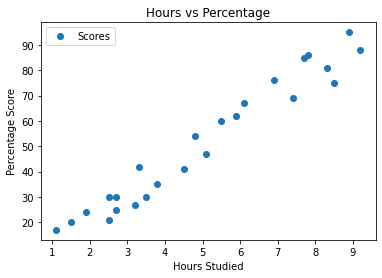

In [6]:
#Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the above figure we can conclude that there is a linear relationship between the number of hours studied and percentage score of the student.**

### **Step 3: Preparing the data**

We will divide the data into "attributes" (inputs) and "labels" (outputs).


In [7]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

**Step A:** Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method. Here I am using 20% as testing set and 80% as training set.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Step 4: Training the data**
After splitting our data into training and testing sets, we will time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Training complete')

Training complete


Slope of the line: [9.91065648]
Intercept of the line: 2.018160041434662


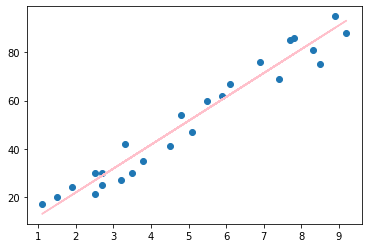

In [11]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

print("Slope of the line:",regressor.coef_)
print("Intercept of the line:",regressor.intercept_)

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='pink');
plt.show()

### **Step 4: Making Predictions**
With the help of trained our algorithm, we will make some predictions.

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# You can also test with your own data
hours = [[7]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[7]]
Predicted Score = 71.39275540593033


### **Step 5: Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

*   Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
*   Mean Squared Error (MSE) is the mean of the squared errors.
*   Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors








In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("Mean Square Error:", metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Square Error: 21.598769307217456
Root Mean Square Error 4.647447612100373
